In [1]:
import numpy as np
import pandas as pd
import csv
with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
original_datei = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(original_datei)
#Einlesen

letzter_buchstabe = []
for index, row in original_datei.iterrows():
    last_character = row["mutant"][-1]
    letzter_buchstabe.append(last_character)
letzter_buchstabe_df = pd.DataFrame(letzter_buchstabe, columns=["New_AS"])
print(letzter_buchstabe_df)
#Letzter Buchstabe in jeder Zeile

number_mutations = original_datei["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
print(number_mutations_Single)
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df = letzter_buchstabe_df[number_mutations_Single]
print(single_mutants_df)
#Filtert alle True Zeilen aus beiden Dataframes und erstellt ein neues Dataframe. Er übernimmt automatisch die Filterung nac

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

In [2]:
dms_score_df = []
for index, row in original_datei.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
print(dms_score_df_alle)
#erstellt Dataframe mit allen DMS-scores und der jeweiligen Experimentnummer

       Fitness_Score
0           1.301030
1           3.137350
2           1.553913
3           3.404237
4           3.738586
...              ...
51709       3.809468
51710       3.760217
51711       3.754101
51712       3.673173
51713       3.735417

[51714 rows x 1 columns]


In [3]:
dms_score_filtered = dms_score_df_alle[number_mutations_Single]
print(dms_score_filtered)
#Dataframe mit allen DMS-scores der Einzelmutanten

       Fitness_Score
4           3.738586
48          3.750487
703         3.666278
924         3.698336
1160        3.629775
...              ...
51709       3.809468
51710       3.760217
51711       3.754101
51712       3.673173
51713       3.735417

[1084 rows x 1 columns]


In [4]:
dms_score_filtered_newAS = single_mutants_df.join(dms_score_filtered)
print(dms_score_filtered_newAS)
#Kombiniert und erstellt ein neues Dataframe mit der neuen AS und dem jeweiligen DMS-score

      New_AS  Fitness_Score
4          R       3.738586
48         Q       3.750487
703        E       3.666278
924        M       3.698336
1160       T       3.629775
...      ...            ...
51709      N       3.809468
51710      C       3.760217
51711      D       3.754101
51712      F       3.673173
51713      H       3.735417

[1084 rows x 2 columns]


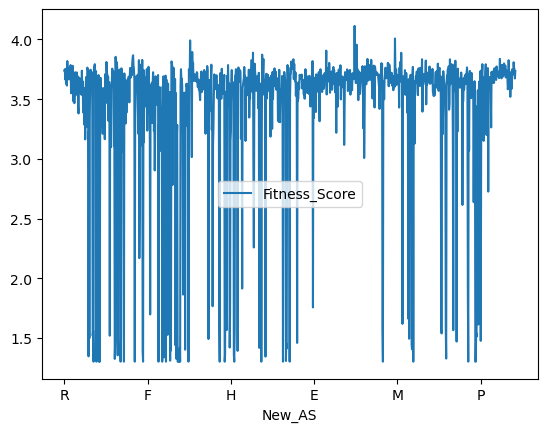

In [5]:
import matplotlib.pyplot as plt
dms_score_filtered_newAS.plot(x="New_AS", y="Fitness_Score", kind="line")
plt.show()
#Hässlich

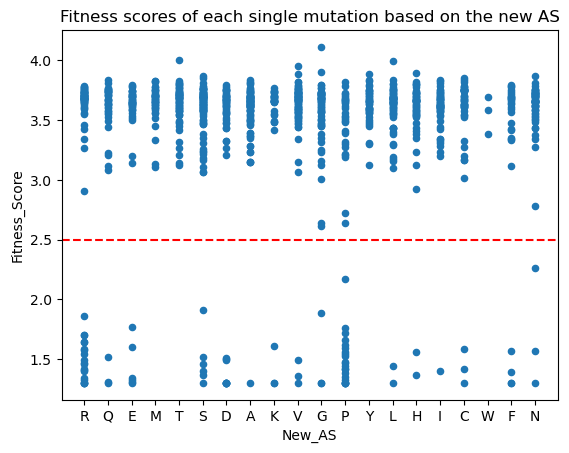

In [6]:
import matplotlib.pyplot as plt
dms_score_filtered_newAS.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.title("Fitness scores of each single mutation based on the new AS")
threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.show()
#Plot zeigt alle Singlemutanten (neue AS) mit dem jeweiligen Fitness score. Man sieht eine eindeutige Trennung bei 2.5


In [7]:
test123 = dms_score_filtered_newAS[dms_score_filtered_newAS["New_AS"] == "W"]
print(test123)
#Sucht aus dem oberen Graph eine spezifische AS und zeigt den DMS-score für die spezifische AS an allen Positionen wo sie vorkommt

      New_AS  Fitness_Score
6303       W       3.380113
46323      W       3.583799
51627      W       3.693903


In [8]:
Ich_will_pos = dms_score_filtered_newAS[dms_score_filtered_newAS["Fitness_Score"] >= 2.5]
print(Ich_will_pos)
#Sucht alle neuen AS, die einen DMS-score >2,5 haben

      New_AS  Fitness_Score
4          R       3.738586
48         Q       3.750487
703        E       3.666278
924        M       3.698336
1160       T       3.629775
...      ...            ...
51709      N       3.809468
51710      C       3.760217
51711      D       3.754101
51712      F       3.673173
51713      H       3.735417

[993 rows x 2 columns]


      New_AS  Fitness_Score
9277       P       1.345553
9579       D       1.497287
10615      Q       1.518885
10726      P       1.560784
10994      R       1.301029
...      ...            ...
51504      R       1.540821
51505      D       1.510939
51519      R       1.641932
51522      K       1.612093
51538      P       1.475405

[91 rows x 2 columns]


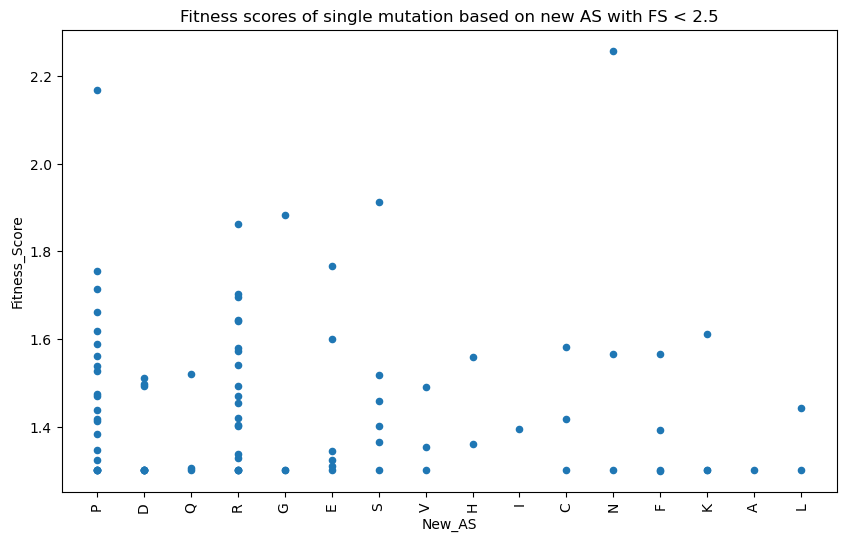

In [9]:
Ich_will_pos_u = dms_score_filtered_newAS[dms_score_filtered_newAS["Fitness_Score"] <= 2.5]
print(Ich_will_pos_u)
Ich_will_pos_u.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation='vertical')
plt.title("Fitness scores of single mutation based on new AS with FS < 2.5")
plt.show()
#Erstellt Graph aller neuen AS die einen DMS-score <2,5 haben

In [10]:
krasse_pos = dms_score_filtered_newAS[dms_score_filtered_newAS["Fitness_Score"] >= 4.0]
print(krasse_pos)
#Sucht alle neuen AS raus, die einen DMS-score >4 haben

      New_AS  Fitness_Score
48819      G       4.113576
50347      T       4.007975


In [11]:
mutations_pos = []
for index, row in original_datei.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
print(mutations_pos_df)
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = original_datei["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
print(number_mutations_Single)
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df_pos = mutations_pos_df[number_mutations_Single]
print(single_mutants_df_pos)
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt

                                  Position
0      3R:V55A:Q94R:A110T:D117G:M153K:D216
1                       3Q:V16A:I167T:L195
2                3Q:Y143C:N164D:S205P:A227
3                            3Q:Y143N:V193
4                                        3
...                                    ...
51709                                  237
51710                                  237
51711                                  237
51712                                  237
51713                                  237

[51714 rows x 1 columns]
0        False
1        False
2        False
3        False
4         True
         ...  
51709     True
51710     True
51711     True
51712     True
51713     True
Name: mutant, Length: 51714, dtype: bool
      Position
4            3
48           3
703          3
924          3
1160         3
...        ...
51709      237
51710      237
51711      237
51712      237
51713      237

[1084 rows x 1 columns]


In [12]:
mutations_pos_df_mit_scores = single_mutants_df_pos.join(dms_score_filtered)
print(mutations_pos_df_mit_scores)
#Kombiniert und erstellt Dataframe mit der Position der Mutation und dem jeweiligen DMS-score (zeigt NICHT die neuen AS)

      Position  Fitness_Score
4            3       3.738586
48           3       3.750487
703          3       3.666278
924          3       3.698336
1160         3       3.629775
...        ...            ...
51709      237       3.809468
51710      237       3.760217
51711      237       3.754101
51712      237       3.673173
51713      237       3.735417

[1084 rows x 2 columns]


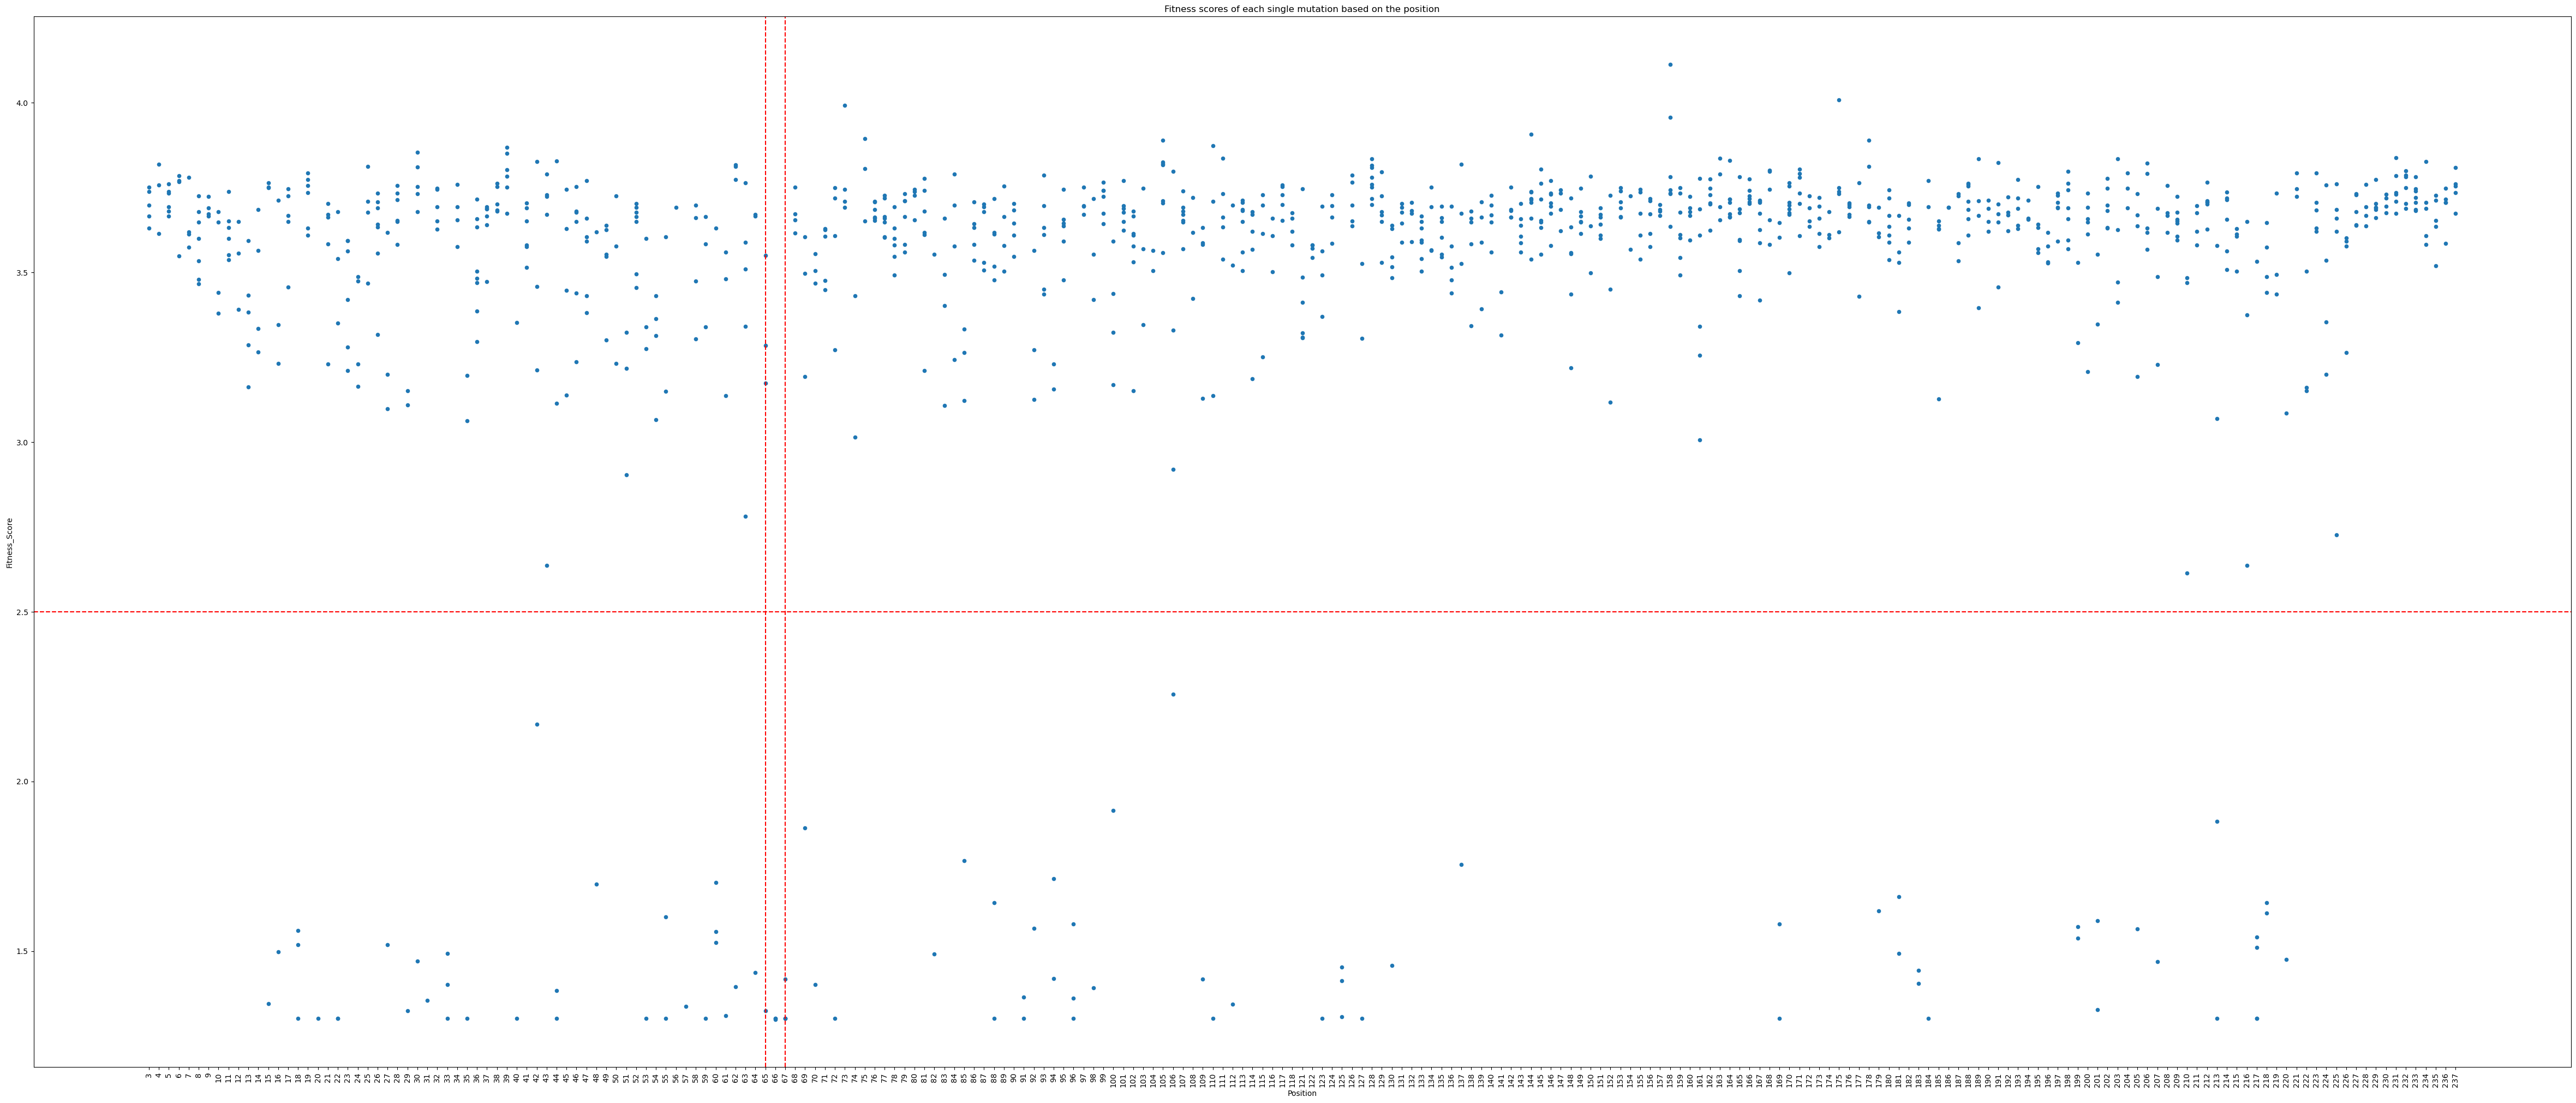

In [13]:
import matplotlib.pyplot as plt
mutations_pos_df_mit_scores.plot(x="Position", y="Fitness_Score", kind="scatter")
plt.title("Fitness scores of each single mutation based on the position")
#plt.figure(figsize=(100, 6))
#Macht das Diagramm auf Größe "Breite, Höhe" größer

#plt.xticks(rotation=45)  #
##Rotate the x-axis labels by 45 degrees

plt.xticks(rotation='vertical')
# Rotate the x-axis labels vertically
plt.gcf().set_size_inches(60, 25)
#Increase the width to 10 inches and height to 6 inches

a_threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
a_threshold_65 = 62
plt.axvline(a_threshold_65, color='red', linestyle='--', label='Threshold_65')
a_threshold_67 = 64
plt.axvline(a_threshold_67, color='red', linestyle='--', label='Threshold_67')
#Positionen 65-67 gehören zum Chromophor
#Interessant ist hier, dass es Mutationen gibt, die trotz Mutation im Chromophor an Position 65 einen guten score haben. Position 66 und 67 jedoch nicht
plt.show()

#Plot mit single Mutanten basierend auf Position der Mutation.

      Position  Fitness_Score
9277        15       1.345553
9579        16       1.497287
10615       18       1.518885
10726       18       1.560784
10994       18       1.301029
...        ...            ...
51504      217       1.540821
51505      217       1.510939
51519      218       1.641932
51522      218       1.612093
51538      220       1.475405

[91 rows x 2 columns]


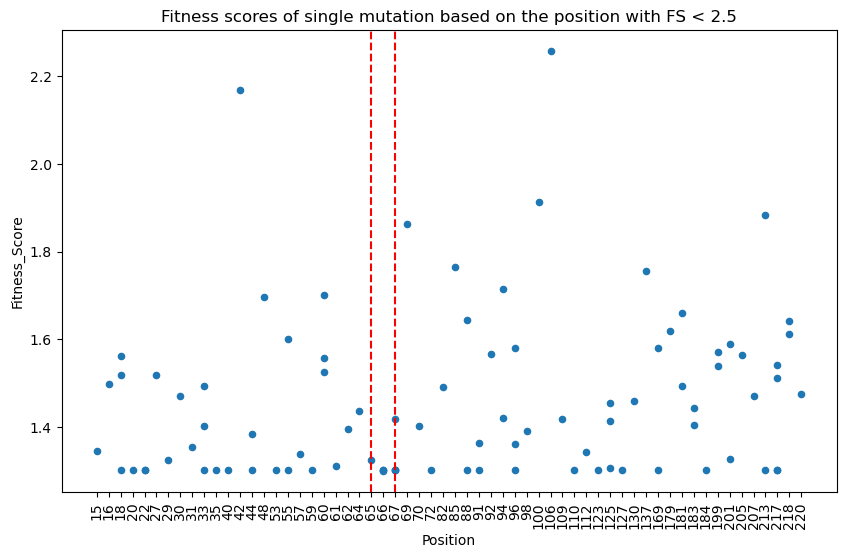

In [14]:
Ich_mag_pos_u = mutations_pos_df_mit_scores[mutations_pos_df_mit_scores["Fitness_Score"] <= 2.5]
print(Ich_mag_pos_u)
Ich_mag_pos_u.plot(x="Position", y="Fitness_Score", kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation='vertical')
plt.title("Fitness scores of single mutation based on the position with FS < 2.5")
b_threshold_65 = 23
plt.axvline(b_threshold_65, color='red', linestyle='--', label='Threshold_65')
b_threshold_67 = 25
plt.axvline(b_threshold_67, color='red', linestyle='--', label='Threshold_67')
#Positionen 65-67 gehören zum Chromophor
plt.show()
#Erstellt Graph aller Positionen die einen DMS-score <2,5 haben

In [15]:
#Korrelation zwischen Position und neuer AS möglich?
## z.B. Prolin führt immer zu schlechtem DMS-score? Ablesen aus den Graphen?
###Man kann keine direkt Aussage treffen, weil jede Position nicht zu jeder AS mutiert wurde. Das heißt man weiss nicht, ob es an der Position, an der AS, oder an beidem lag.


In [16]:
#Nächster Schritt: Alle neuen AS und alle Positionen raussuchen, die mindestens zweimal vorkommen --> Aus dem Dataframe ohne Threshhold (also wo alle singlemutanten und Positionen drin sind)
print(mutations_pos_df_mit_scores)
#Kombiniert und erstellt Dataframe mit der Position der Mutation und dem jeweiligen DMS-score (zeigt NICHT die neuen AS)


      Position  Fitness_Score
4            3       3.738586
48           3       3.750487
703          3       3.666278
924          3       3.698336
1160         3       3.629775
...        ...            ...
51709      237       3.809468
51710      237       3.760217
51711      237       3.754101
51712      237       3.673173
51713      237       3.735417

[1084 rows x 2 columns]


In [17]:
print(dms_score_filtered_newAS)
#Kombiniert und erstellt Dataframe mit der neuen AS und dem jeweiligen DMS-score

      New_AS  Fitness_Score
4          R       3.738586
48         Q       3.750487
703        E       3.666278
924        M       3.698336
1160       T       3.629775
...      ...            ...
51709      N       3.809468
51710      C       3.760217
51711      D       3.754101
51712      F       3.673173
51713      H       3.735417

[1084 rows x 2 columns]


In [18]:
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]
print(Roman_1)
#Erstellt neues Dataframe mit Position, neuer AS und DMS-score

      Position New_AS  Fitness_Score
4            3      R       3.738586
48           3      Q       3.750487
703          3      E       3.666278
924          3      M       3.698336
1160         3      T       3.629775
...        ...    ...            ...
51709      237      N       3.809468
51710      237      C       3.760217
51711      237      D       3.754101
51712      237      F       3.673173
51713      237      H       3.735417

[1084 rows x 3 columns]


In [19]:
#import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

# Assuming you have three variables x, y, and z
#x = Roman_1["Position"]
#y = Roman_1["New_AS"]
#z = Roman_1["Fitness_Score"]

# Create a mapping of non-numerical values to unique numerical values
#value_mapping = {"A": 1, "C": 1.1}

# Convert non-numerical values to their corresponding numerical values
#x = [value_mapping[val] if val in value_mapping else val for val in x]
#y = [value_mapping[val] if val in value_mapping else val for val in y]
#z = [value_mapping[val] if val in value_mapping else val for val in z]

# Create a 3D plot
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

# Plot the variables
#ax.scatter(x, y, z)

# Set labels and title
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.set_title('3D Plot')

#plt.show()
##### Am besten keinen 3D-Graphen machen, weil der mit den Buchstaben nix anfangen kann


In [21]:
gesuchte_AS = "R"
#Spezifische AS nach der ich suche
maske_gesuchte_AS = Roman_1["New_AS"] == gesuchte_AS
#Macht eine boolean-Maske
gesuchte_AS_df = Roman_1[maske_gesuchte_AS]
#Alle Zeilen die meine BEdingung erfüllen werden geindext

print(gesuchte_AS_df)
#Sucht alle Proline aus dem kombinierten Dataframe und erstellt ein neues Dataframe

      Position New_AS  Fitness_Score
4            3      R       3.738586
1755         5      R       3.761089
2782         6      R       3.785387
3621         7      R       3.779372
6379        10      R       3.678994
...        ...    ...            ...
51623      228      R       3.758577
51666      231      R       3.709842
51676      232      R       3.688017
51684      233      R       3.781390
51706      236      R       3.706509

[78 rows x 3 columns]


In [23]:
gesuchte_pos_65 = "113"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_65 = Roman_1["Position"] == gesuchte_pos_65
#Macht eine boolean-Maske
gesuchte_pos_65_df = Roman_1[maske_gesuchte_pos_65]
#Alle Zeilen die meine Bedingung erfüllen werden geindext

print(gesuchte_pos_65_df)
#Sucht alle neuen AS an Position 65 aus dem kombinierten Dataframe und erstellt ein neues Dataframe

      Position New_AS  Fitness_Score
42179      113      G       3.712683
42222      113      E       3.504341
42251      113      M       3.559147
42349      113      T       3.706729
42391      113      N       3.685426
42393      113      Q       3.648993
42404      113      R       3.682043


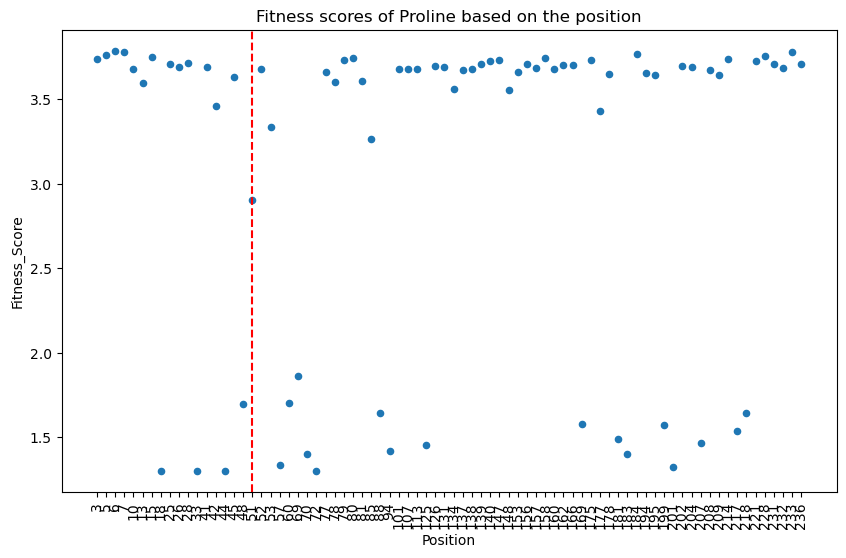

In [25]:
gesuchte_AS_df.plot(x="Position", y="Fitness_Score", kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation='vertical')
plt.title("Fitness scores of Proline based on the position")
c_threshold_65 = 17
plt.axvline(c_threshold_65, color='red', linestyle='--', label='Threshold_65')
#Position 65 gehört zum Chromophor
plt.show()
#Erstellt Graph aller Positionen wo Proline vorkommen aufgetragen gegen den jeweiligen DMS-score

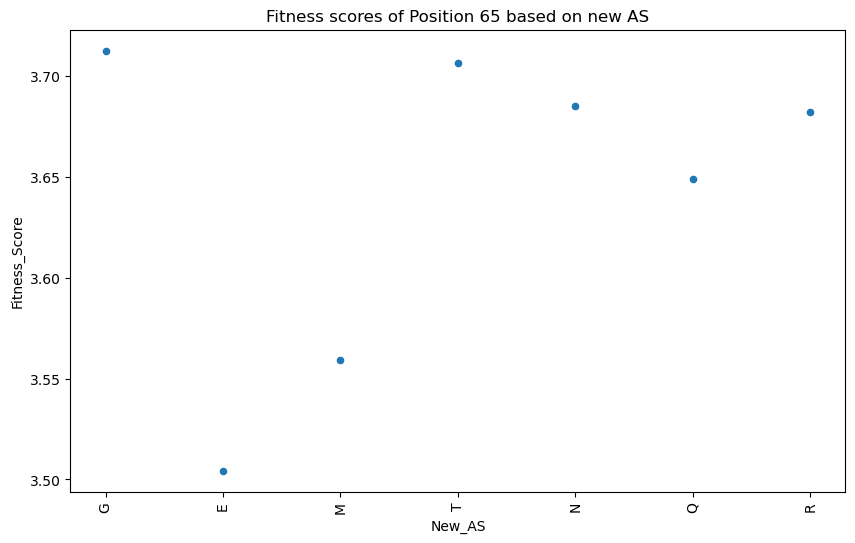

In [26]:
gesuchte_pos_65_df.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation='vertical')
plt.title("Fitness scores of Position 65 based on new AS")
plt.show()
#Erstellt Graph aller neuen AS die auf Position 65 vorkommen aufgetragen gegen den jeweiligen DMS-score

      Position New_AS  Fitness_Score
30590       65      T       3.550427
30708       65      P       1.324287
30737       65      L       3.174363
30756       65      A       3.284241


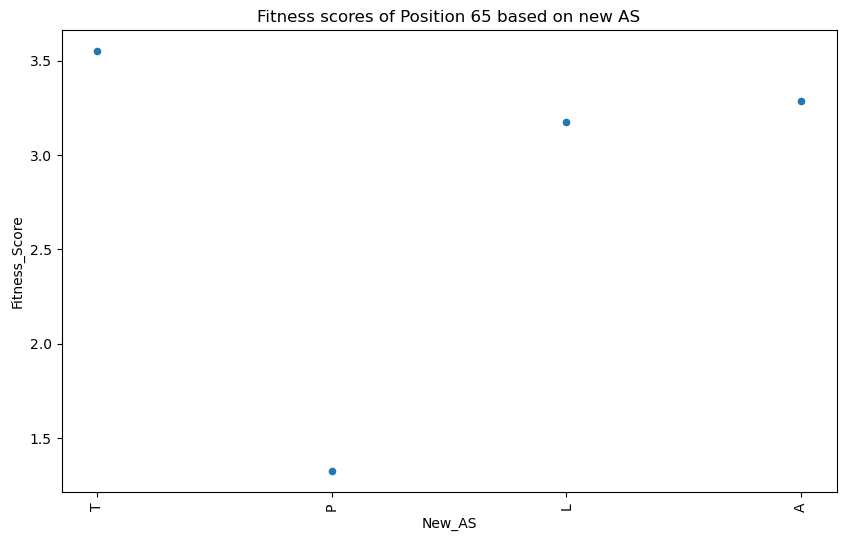

      Position New_AS  Fitness_Score
30871       66      C       1.301031
30903       66      N       1.301031
30988       66      F       1.298941


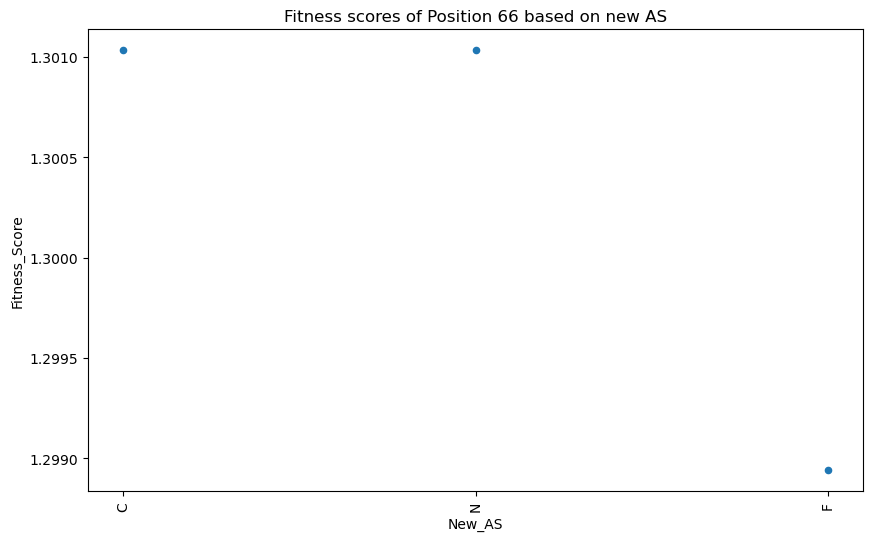

      Position New_AS  Fitness_Score
31047       67      V       1.301547
31063       67      D       1.300841
31070       67      C       1.416921
31099       67      S       1.301030


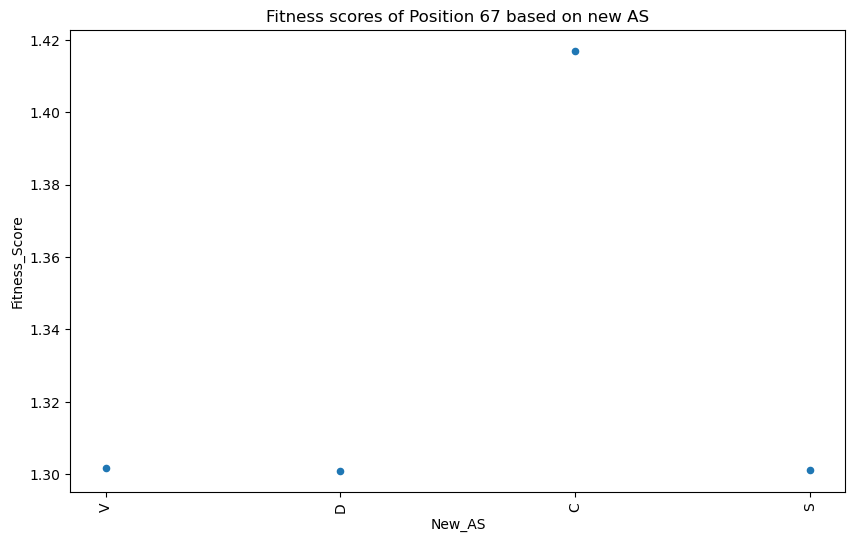

In [27]:
gesuchte_pos_65 = "65"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_65 = Roman_1["Position"] == gesuchte_pos_65
#Macht eine boolean-Maske
gesuchte_pos_65_df = Roman_1[maske_gesuchte_pos_65]
#Alle Zeilen die meine Bedingung erfüllen werden geindext

print(gesuchte_pos_65_df)
#Sucht alle neuen AS an Position 65 aus dem kombinierten Dataframe und erstellt ein neues Dataframe
gesuchte_pos_65_df.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation='vertical')
plt.title("Fitness scores of Position 65 based on new AS")
plt.show()
#Erstellt Graph aller neuen AS die auf Position 65 vorkommen aufgetragen gegen den jeweiligen DMS-score
#--------------------------------------------------------------------------------------------------------------------------
gesuchte_pos_66 = "66"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_66 = Roman_1["Position"] == gesuchte_pos_66
#Macht eine boolean-Maske
gesuchte_pos_66_df = Roman_1[maske_gesuchte_pos_66]
#Alle Zeilen die meine Bedingung erfüllen werden geindext

print(gesuchte_pos_66_df)
#Sucht alle neuen AS an Position 66 aus dem kombinierten Dataframe und erstellt ein neues Dataframe
gesuchte_pos_66_df.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation='vertical')
plt.title("Fitness scores of Position 66 based on new AS")
plt.show()
#Erstellt Graph aller neuen AS die auf Position 66 vorkommen aufgetragen gegen den jeweiligen DMS-score
#----------------------------------------------------------------------------------------------------------------------------
gesuchte_pos_67 = "67"
#Spezifische Position nach der ich suche
maske_gesuchte_pos_67 = Roman_1["Position"] == gesuchte_pos_67
#Macht eine boolean-Maske
gesuchte_pos_67_df = Roman_1[maske_gesuchte_pos_67]
#Alle Zeilen die meine Bedingung erfüllen werden geindext

print(gesuchte_pos_67_df)
#Sucht alle neuen AS an Position 67 aus dem kombinierten Dataframe und erstellt ein neues Dataframe
gesuchte_pos_67_df.plot(x="New_AS", y="Fitness_Score", kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation='vertical')
plt.title("Fitness scores of Position 67 based on new AS")
plt.show()
#Erstellt Graph aller neuen AS die auf Position 67 vorkommen aufgetragen gegen den jeweiligen DMS-score

In [ ]:
#Next step: Auf die AS-Eigenschaften übertragen --> Frage: Wie kann ich den eigenschaften einen numerischen Wert geben?
#Muss noch gemacht werden: KAnn ich ein Korrelationsdiagramm erstellen, wo die neue AS die Auswirkung direkt zeigt. Also praktisch ein cross-table aus allen AS an allen Positionen die ich habe? Um herauszufinden, ob es an der Position oder der AS liegt?